### Performing generated paraphrased texts similarity analysis with the original texts
using: https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html#sphx-glr-auto-examples-core-run-similarity-queries-py

In [1]:
import os
from collections import defaultdict
from gensim import corpora
from gensim import models
from gensim import similarities
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grzeg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def remove_stopwords(document):
    return [word for word in document.lower().split() if word not in stop_words]

def calculate_similarities(raw_texts, original_text):
    
    texts = [remove_stopwords(document) for document in raw_texts]
    
    frequency = defaultdict(int)
    for text in texts:
        for token in text:
            frequency[token] += 1
    
    texts = [
        [token for token in text if frequency[token] > 1]
        for text in texts
    ]
    
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)
    
    index = similarities.MatrixSimilarity(lsi[corpus])
    
    vec_bow = dictionary.doc2bow(remove_stopwords(original_text))
    vec_lsi = lsi[vec_bow]
    
    # Performing queries
    sims = index[vec_lsi]
    
    return sims

In [8]:
texts = ["time to say goodbye", "aa"]
text = "company went bankrupt"
stop_words = stopwords.words('english')
sims = calculate_similarities(texts, text)
sims

error: (lwork>=n||lwork==-1) failed for 1st keyword lwork: dgeqrf:lwork=0

In [4]:
summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw'
summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling'
summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization_directory = 'summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization'

In [17]:
original_summarized_filenames_dict = {}
for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory):
    original_summarized_filenames_dict[filename.split('-')[0]] = filename
len(original_summarized_filenames_dict)

232

In [29]:
from tqdm import tqdm

paraphrased_texts = []
all_similarities = []
not_found_ciks = []

stop_words = stopwords.words('english')

previous_cik = -1

sorted_filenames = sorted(os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory))
original_summarized_filenames_dict_keys = original_summarized_filenames_dict.keys()

for filename in tqdm(sorted_filenames):
    cik = filename.split('-')[0]
    
    if previous_cik != cik and previous_cik != -1:
        
        if cik in original_summarized_filenames_dict_keys:
            
            original_filename = original_summarized_filenames_dict[cik]
            with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory, original_filename), 'r') as file:
                original_text = file.read()
        
            sims = calculate_similarities(paraphrased_texts, original_text)
            all_similarities.append(sims)
        else:
            not_found_ciks.append(cik)
            
        paraphrased_texts = []
        
    with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory, filename), 'r') as file:
        text = file.read()
        
    paraphrased_texts.append(text)
        
    previous_cik = cik

100%|██████████| 2748/2748 [00:09<00:00, 287.36it/s]


In [30]:
len(not_found_ciks)

16

In [31]:
len(all_similarities)

231

In [43]:
all_similarities_flattened = [ round(sim, 3) for sims in all_similarities for sim in sims]
len(all_similarities_flattened)

2549

In [44]:
all_similarities_flattened[:3]

[0.756, 0.764, 0.995]

(array([  1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   2.,   0.,   1.,   1.,   0.,   1.,   1.,   0.,   1.,   1.,
          4.,   0.,   0.,   2.,   4.,   2.,   2.,   1.,   1.,   0.,   1.,
          1.,   2.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   3.,   1.,   1.,   0.,   2.,   0.,   1.,
          2.,   0.,   0.,   1.,   2.,   1.,   3.,   0.,   1.,   0.,   3.,
          0.,   2.,   3.,   2.,   1.,   2.,   4.,   1.,   2.,   5.,   0.,
          0.,   1.,   1.,   3.,   3.,   4.,   1.,   5.,   2.,   1.,   5.,
          3.,   6.,   5.,   2.,   1.,   2.,   1.,   4.,   3.,   4.,   1.,
          5.,   4.,   2.,   5.,   4.,  11.,   7.,   6.,   7.,   5.,   5.,
          4.,   5.,   7.,   7.,   4.,  10.,   9.,   7.,   8.,  12.,   9.,
         12.,   8.,  15.,   9.,  12.,  11.,   9.,  13.,  15.,   7.,  15.,
         19.,   8.,  15.,  13.,  12., 

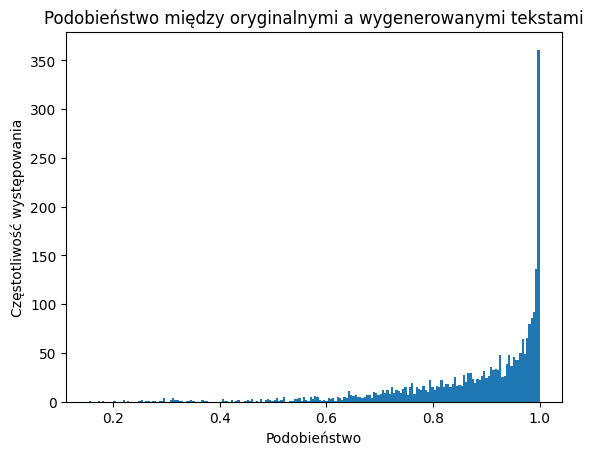

In [52]:
import matplotlib.pyplot as plt

plt.title('Podobieństwo między oryginalnymi a wygenerowanymi tekstami')
plt.xlabel('Podobieństwo')
plt.ylabel('Częstotliwość występowania')
plt.hist(all_similarities_flattened, bins=200)

(array([  1.,   2.,   1.,   2.,   1.,   3.,   2.,   3.,   5.,  10.,   3.,
          4.,   3.,   1.,   3.,   4.,   3.,   4.,   4.,   8.,   9.,   8.,
          5.,  13.,  11.,  14.,  10.,  14.,  22.,  25.,  21.,  30.,  36.,
         44.,  45.,  56.,  48.,  60.,  58.,  73.,  74.,  80., 100., 102.,
        119., 140., 150., 182., 258., 675.]),
 array([0.154     , 0.17092   , 0.18784   , 0.20476   , 0.22168   ,
        0.2386    , 0.25551999, 0.27243999, 0.28935999, 0.30627999,
        0.32319999, 0.34011999, 0.35703999, 0.37395999, 0.39087999,
        0.40779999, 0.42471999, 0.44163999, 0.45855999, 0.47547999,
        0.49239999, 0.50932002, 0.52623999, 0.54316002, 0.56007999,
        0.57700002, 0.59391999, 0.61084002, 0.62775999, 0.64468002,
        0.66159999, 0.67852002, 0.69543999, 0.71236002, 0.72927999,
        0.74620003, 0.76312   , 0.78004003, 0.79696   , 0.81388003,
        0.8308    , 0.84772003, 0.86464   , 0.88156003, 0.89848   ,
        0.91540003, 0.93232   , 0.94924003, 0.

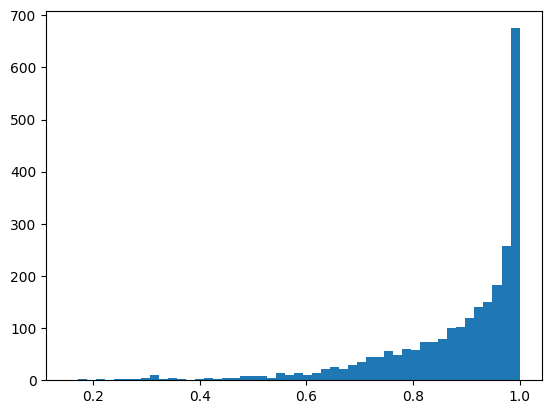

In [46]:
plt.hist(all_similarities_flattened, bins=50)

(array([   7.,   23.,   14.,   23.,   46.,   85.,  176.,  295.,  475.,
        1405.]),
 array([0.154     , 0.2386    , 0.32319999, 0.40779999, 0.49239999,
        0.57700002, 0.66159999, 0.74620003, 0.8308    , 0.91540003,
        1.        ]),
 <BarContainer object of 10 artists>)

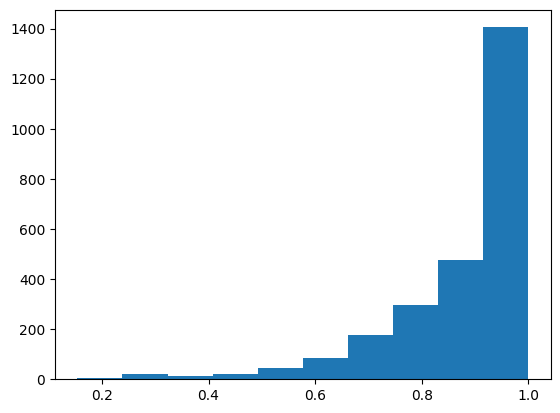

In [47]:
plt.hist(all_similarities_flattened, bins=10)

In [58]:
len([sim for sim in all_similarities_flattened if sim >= 0.8])

2002

In [54]:
len([sim for sim in all_similarities_flattened if sim < 0.9])

1038

In [50]:
orig_ciks = []
for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_directory):
    cik = filename.split('-')[0]
    orig_ciks.append(cik)
    
print(len(orig_ciks))

232


In [59]:
import pandas as pd
ecl_dataset = pd.read_csv('ECL.csv')
ecl_dataset.head()

C:\Users\grzeg\AppData\Local\Temp\ipykernel_15236\1277137587.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  ecl_dataset = pd.read_csv('ECL.csv')


,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750.0,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750.0,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750.0,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750.0,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750.0,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [60]:
ecl_dataset['cik'] = ecl_dataset['cik'].astype(int)

ecl_dataset.head()

,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [61]:
ecl_dataset['cik'] = ecl_dataset['cik'].astype(str)
ecl_dataset.head()

,Unnamed: 0,cik,company,period_of_report,gvkey,datadate,filename,can_label,qualified,label,bankruptcy_prediction_split,bankruptcy_date_1,bankruptcy_date_2,bankruptcy_date_3,filing_date
0,1,1750,AAR CORP,1994-05-31,1004.0,31/05/1994,/1994/1750_10K_1994_0000912057-94-002818.json,True,Yes,False,train,NaN,NaN,NaN,1994-08-24
1,2,1750,AAR CORP,1995-05-31,1004.0,31/05/1995,/1995/1750_10K_1995_0000912057-95-006316.json,True,Yes,False,train,NaN,NaN,NaN,1995-08-11
2,3,1750,AAR CORP,1996-05-31,1004.0,31/05/1996,/1996/1750_10K_1996_0000912057-96-018355.json,True,Yes,False,train,NaN,NaN,NaN,1996-08-20
3,4,1750,AAR CORP,1997-05-31,1004.0,31/05/1997,/1997/1750_10K_1997_0000912057-97-028915.json,True,Yes,False,train,NaN,NaN,NaN,1997-08-22
4,5,1750,AAR CORP,1998-05-31,1004.0,31/05/1998,/1998/1750_10K_1998_0001047469-98-032283.json,True,Yes,False,train,NaN,NaN,NaN,1998-08-20


In [62]:
ciks = ecl_dataset['cik'].values
max([len(cik) for cik in ciks])

7

In [67]:
from collections import Counter
ciks_sec = [filename.split('-')[0] for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_second_summarization_directory)]

ciks_sec_counter = Counter(ciks_sec)

for cik, count in ciks_sec_counter.items():
    if count > 1:
        print(cik, count)

In [70]:
import re

def clean_markdown(text):
    markdown_chars = ["*", "_", "#", "~", "`", ">", "=", "[", "]"]
    text = re.sub(f"[{re.escape(''.join(markdown_chars))}]", "", text)
    text = re.sub(r"\n", " ", text)
    
    return text

In [75]:
textual_data = pd.DataFrame(columns=['cik', 'text'])

for filename in os.listdir(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory):
    
    cik = filename.split('-')[0]
    
    if 'paraphrased-raw' in filename:
        filename_id = int(filename.split('-')[3].split('.')[0])
        if filename_id == 10:
            zero_padded_id = f'10'
        elif 0 <= filename_id <= 9:
            zero_padded_id = f'0{filename_id}'
        else:
            print('error: id not in range')
            zero_padded_id = f'99'
            
        cik = f'{cik}{zero_padded_id}'
        
    cik = int(cik)
    
    with open(os.path.join(summarized_mda_sections_for_not_eligible_companies_for_oversampling_paraphrased_raw_directory, filename), 'r') as file:
        text = file.read()

        text = clean_markdown(text)
        
        textual_data = pd.concat([textual_data, pd.DataFrame([{'cik': cik, 'text': text}])], ignore_index=True)
   
textual_data.to_csv(f'synthetic_textual_data.csv', index=False)
print(len(textual_data))
textual_data.head() 

2748


,cik,text
0,100023400,"Because of the economic downturn and declining housing prices, the company lost $32.6 million in 2008, a significant decline from $15.6 million in 2007 and $26.9 million in 2006. As a result, their audit report qualified them as going concern, and their real estate loan portfolio deteriorated significantly. The company acknowledges substantial financial risks despite having over $400 million in cash and cash equivalents. In an effort to stabilize losses and return to profitability, the company is reducing lending exposures, seeking loan participation and sales, cutting costs, and eliminating dividends. Private equity investments are also being explored as strategic options. It is uncertain whether these efforts will succeed due to limited access to capital markets. While the company is reducing its reliance on wholesale funding sources, the suspension of their FHLB borrowing facility poses challenges. There has been a significant increase in non-performing loans, particularly in construction and land development, which has resulted in a higher provision for loan losses. The management believes the allowance for loan losses is adequate, but future provisions are uncertain. Credit ratings were also downgraded for the company's $1.1 billion investment securities portfolio. It is acknowledged by management that their allowance for loan losses accounting policy is critical to their financial condition and results of operations, despite the inherent uncertainties in its estimation."
1,100023401,"Due to the economic downturn and declining housing prices, the company suffered a net loss of $32.6 million in 2008, down significantly from net income of $15.6 million in 2007 and $26.9 million in 2006. This led to a going concern qualification in their audit report and significant deterioration of their real estate loan portfolio, particularly construction and land development loans. However, the company acknowledges substantial risks to its future financial performance despite having over $400 million in cash and cash equivalents. In order to stabilize losses and return to profitability, the company will reduce lending exposures, increase lending participation, cut costs, and eliminate dividends. Investments in private equity are also being considered as strategic options. There is, however, limited access to capital markets, and there is no guarantee that these efforts will succeed. Despite the suspension of their FHLB borrowing facility, the company's reliance on wholesale funding sources is decreasing. Loan losses increased due to an increase in non-performing loans, especially in construction and land development. Although management believes the loan loss allowance is adequate, future provisions remain uncertain. Investment securities totaling $1.1 billion in the company's portfolio were also downgraded. In its financial condition and results of operations, management acknowledges the importance of its allowance for loan losses accounting policy and the inherent uncertainties in its estimation."
2,100023410,"The company incurred a net loss of $32.6 million for the year ended December 31, 2008, and received a going concern qualification in its audit report due to the national economic slowdown and its impact on the real estate market. Despite the net loss, the company believes it has the ability to meet its current obligations and is focused on strengthening its liquidity position, with over $400 million in cash and cash equivalents as of December 31, 2008. The company is taking tactical actions to preserve capital, reduce lending exposures, and increase liquidity, including slowing loan originations, growing retail deposits, reducing brokered deposits, seeking loan participation and sales arrangements, reducing expenses, and eliminating dividends. The company aims to return to profitability by reducing its size, stabilizing losses, managing problematic assets, and reducing expenses. Key objectives include impro

### Assessing generated paraphrased texts similarity with the original texts

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

texts grouped by base_cik with 10/11 texts are generated and could be compared with the original text

In [27]:
textual_dataset = pd.read_csv('textual_data_matched_split_version3.csv')

In [28]:
textual_dataset['base_cik'] = textual_dataset['cik'].apply(lambda x: str(x)[:-2])
textual_dataset.head()

,cik,label,subset,text,base_cik
0,1476045,False,train,Chatham Lodging Trust is a REIT that invests i...,14760
1,92352903,True,train,A cooperative bankshares corporation. The com...,923529
2,833829,False,train,"Wind River, a global leader in Device Software...",8338
3,914789,False,train,"- Reported a 20% increase in revenue, driven b...",9147
4,853816,False,train,"Landstar System, Inc. is an asset-light provid...",8538


In [29]:
textual_dataset_grouped = textual_dataset[textual_dataset['label'] == True].groupby('base_cik')
textual_dataset_grouped.size().value_counts()

1     314
11    208
10     21
2       5
Name: count, dtype: int64

In [21]:
len(textual_dataset['cik'].unique())

7214

In [36]:
all_similarities = []
for base_cik, group in textual_dataset_grouped:
    if len(group) == 11:
        texts = group.text.values
        
        vectorizer = TfidfVectorizer().fit_transform(texts)
        cosine_similarities = cosine_similarity(vectorizer[0:1], vectorizer[1:])
        
        all_similarities.extend(list(cosine_similarities[0]))
len(all_similarities)

2080

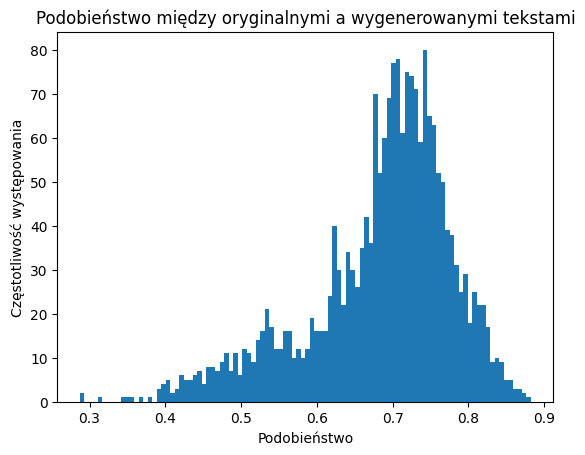

In [39]:
import matplotlib.pyplot as plt

plt.title('Podobieństwo między oryginalnymi a wygenerowanymi tekstami (TF-IDF)')
plt.xlabel('Podobieństwo')
plt.ylabel('Częstotliwość występowania')
plt.hist(all_similarities, bins=100)
plt.savefig('artificial_positive_texts_similarity_histogram.png')
plt.show()

In [44]:
import spacy
from tqdm import tqdm

nlp = spacy.load('en_core_web_lg')

all_similarities_spacy = []

for base_cik, group in tqdm(textual_dataset_grouped):
    if len(group) == 11:
        texts = group.text.values
        
        original_doc = nlp(texts[0])
        for i, text in enumerate(texts[1:], 1):
            synonymized_doc = nlp(text)
            similarity = original_doc.similarity(synonymized_doc)
            all_similarities_spacy.append(similarity)
            
len(all_similarities_spacy)

100%|██████████| 548/548 [00:53<00:00, 10.28it/s]


2080

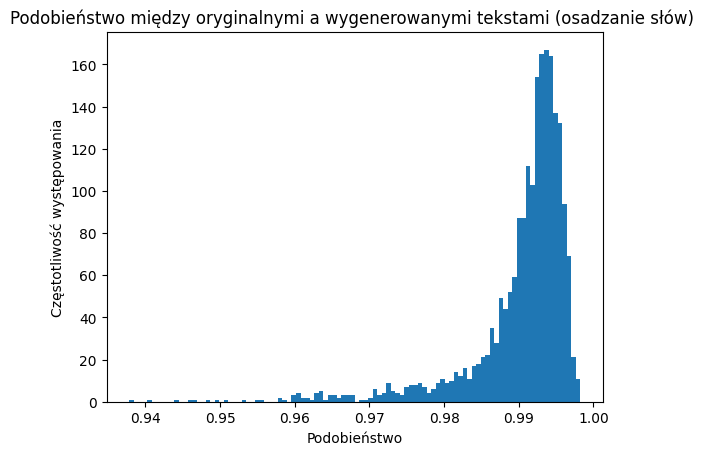

In [45]:
plt.title('Podobieństwo między oryginalnymi a wygenerowanymi tekstami (osadzanie słów) ')
plt.xlabel('Podobieństwo')
plt.ylabel('Częstotliwość występowania')
plt.hist(all_similarities_spacy, bins=100)
plt.savefig('artificial_positive_texts_similarity_histogram_spacy.png')
plt.show()

### Assessing whole textual dataset

In [46]:
textual_dataset = pd.read_csv('textual_data_matched_split_version3.csv')
textual_dataset.head()

,cik,label,subset,text
0,1476045,False,train,"Chatham Lodging Trust is a REIT that invests in upscale extended-stay and premium-branded select-service hotels. As of December 31, 2019, the company owned 40 hotels and held non-controlling interests in two joint ventures that own 94 hotels. The company's revenue increased $4.1 million in 2019, driven by acquisitions, but comparable hotel revenue decreased $3.0 million. RevPAR for their 40 wholly-owned hotels decreased 1.6% in 2019 due to lower growth in the upscale segment and new supply in their markets. Hotel operating expenses increased 2.2% due to acquisitions, with comparable hotel expenses slightly increasing. Net income decreased from $30.9 million in 2018 to $18.9 million in 2019, primarily due to impairment charges in their joint venture investments. The company utilizes non-GAAP financial measures like FFO, Adjusted FFO, EBITDA, EBITDAre, Adjusted EBITDA, and Adjusted Hotel EBITDA to provide investors with additional insights into operating performance. The company primarily funds its operations through net cash from operations and debt and equity issuances. The company had $6.6 million in cash and cash equivalents and $160.0 million available under their revolving credit facility as of December 31, 2019. Chatham Lodging Trust plans to maintain a leverage ratio of net debt to hotel investment at cost similar to historical levels, which was 34.1% at December 31, 2019. The company expects to meet its short-term liquidity requirements through cash flow from operations, cash balances, and borrowings under their revolving credit facility, and long-term liquidity requirements through borrowings, equity issuances, or asset sales. The company intends to continue investing in hotel properties and financing these investments with a mix of free cash flow, debt, and equity. They anticipate spending $22.9 million on capital expenditures in 2020, focusing on renovations and improvements in existing hotels. The company identifies inflation and competition as factors that could impact its ability to adjust room rates. Finally, they highlight critical accounting policies related to hotel property valuation, investments in unconsolidated real estate entities, revenue recognition, share-based compensation, and income taxes."
1,92352903,True,train,"A cooperative bankshares corporation. The company lost $44.6 million in 2008 as opposed to $8.1 million in 2007, primarily due to a significant increase in provision for loan losses to $36.1 million in 2008 from $1.5 million in 2007. While total assets were slightly up to $951.0 million, the bank utilized borrowing to fund the growth of loans, resulting in a decrease in cash and cash equivalents. In 2007, there were $11.6 million in nonperforming assets, or 1.25% of assets, while in 2008, there were $91.6 million, or 9.63% of assets. Regulatory requirements require the bank to have a Tier 1 Core Capital ratio of 3.48% and a Total Risk-Based Capital ratio of 5.70%. As a result, the bank is required to comply with regulation regarding asset growth, dividends, brokered deposits, and the solicitation of deposits. A potential sale or merger would address the company's capital shortfall and meet regulatory requirements, so it is raising capital and exploring strategic options. A challenging economic environment poses significant challenges to the company's continuation as a going concern."
2,833829,False,train,"Wind River, a global leader in Device Software Optimization, experienced a 15% increase in total revenues in fiscal year 2008, reaching $328.6 million, driven by growth in subscription and service revenues. Despite the revenue increase, the company reported a net loss of $2.4 million, attributed to slower growth in deferred revenue and increased operating expenses. The company's shift towards a subscription-based model led to a decline in perpetual license revenues but contributed to an increase in subscription revenues. Service revenues, parti

Company names might be removed from the text, but that was problematic

In [53]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha]
    return " ".join(tokens)

textual_dataset['cleaned_text'] = textual_dataset['text'].apply(preprocess_text)
textual_dataset.head()

,cik,label,subset,text,cleaned_text
0,1476045,False,train,"Chatham Lodging Trust is a REIT that invests in upscale extended-stay and premium-branded select-service hotels. As of December , , the company owned hotels and held non-controlling interests in two joint ventures that own hotels. The company's revenue increased $. million in , driven by acquisitions, but comparable hotel revenue decreased $. million. RevPAR for their wholly-owned hotels decreased .% in due to lower growth in the upscale segment and new supply in their markets. Hotel operating expenses increased .% due to acquisitions, with comparable hotel expenses slightly increasing. Net income decreased from $. million in to $. million in , primarily due to impairment charges in their joint venture investments. The company utilizes non-GAAP financial measures like FFO, Adjusted FFO, EBITDA, EBITDAre, Adjusted EBITDA, and Adjusted Hotel EBITDA to provide investors with additional insights into operating performance. The company primarily funds its operations through net cash from operations and debt and equity issuances. The company had $. million in cash and cash equivalents and $. million available under their revolving credit facility as of December , . Chatham Lodging Trust plans to maintain a leverage ratio of net debt to hotel investment at cost similar to historical levels, which was .% at December , . The company expects to meet its short-term liquidity requirements through cash flow from operations, cash balances, and borrowings under their revolving credit facility, and long-term liquidity requirements through borrowings, equity issuances, or asset sales. The company intends to continue investing in hotel properties and financing these investments with a mix of free cash flow, debt, and equity. They anticipate spending $. million on capital expenditures in , focusing on renovations and improvements in existing hotels. The company identifies inflation and competition as factors that could impact its ability to adjust room rates. Finally, they highlight critical accounting policies related to hotel property valuation, investments in unconsolidated real estate entities, revenue recognition, share-based compensation, and income taxes.",chatham lodging trust reit invest upscale extendedstay premiumbranded selectservice hotel december company own hotel hold noncontrolle interest two joint venture hotel companys revenue increase million drive acquisition comparable hotel revenue decrease million revpar whollyowned hotel decrease due low growth upscale segment new supply market hotel operating expense increase due acquisition comparable hotel expense slightly increase net income decrease million million primarily due impairment charge joint venture investment company utilize nongaap financial measure like ffo adjust ffo ebitda ebitdare adjust ebitda adjust hotel ebitda provide investor additional insight operating performance company primarily fund operation net cash operation debt equity issuance company million cash cash equivalent million available revolving credit facility december chatham lodge trust plan maintain leverage ratio net debt hotel investment cost similar historical level december company expect meet shortterm liquidity requirement cash flow operation cash balance borrowing revolve credit facility longterm liquidity requirement borrowing equity issuance asset sale company intend continue invest hotel property finance investment mix free cash flow debt equity anticipate spend million capital expenditure focus renovation improvement exist hotel company identify inflation competition factor could impact ability adjust room rate finally highlight critical accounting policy relate hotel property valuation investment unconsolidated real estate entity revenue recognition sharebase compensation income taxis
1,92352903,True,train,"A cooperative bankshares corporation. The company lost $. million in as opposed to $. million in , primarily due to a significa

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

In [57]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [71]:
vectorizer = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
X = vectorizer.fit_transform(textual_dataset['cleaned_text'])

lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=2, random_state=42)

In [72]:
topic_distribution = lda.transform(X)
predicted_topics = topic_distribution.argmax(axis=1)

predicted_topics = [True if topic == 1 else False for topic in predicted_topics]

# Add predicted topics to the original dataset
textual_dataset['predicted_topic'] = predicted_topics

In [73]:
# accuracy
len(textual_dataset[textual_dataset['label'] == textual_dataset['predicted_topic']]) / len(textual_dataset)

0.47712780704186303

In [59]:
no_top_words = 20
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

Topic 1:
increase loan million income net capital risk asset rate investment decrease growth loss financial companys credit expense market include liquidity
Topic 2:
million revenue increase cash sale cost growth capital debt operation market acquisition product decrease expense companys net financial include facility


### Exploratory Data Analysis (EDA)

In [60]:
from wordcloud import WordCloud

bankrupt_texts = ' '.join(textual_dataset[textual_dataset['label'] == True]['cleaned_text'])
non_bankrupt_texts = ' '.join(textual_dataset[textual_dataset['label'] == False]['cleaned_text'])

wordcloud_bankrupt = WordCloud().generate(bankrupt_texts)
wordcloud_non_bankrupt = WordCloud().generate(non_bankrupt_texts)

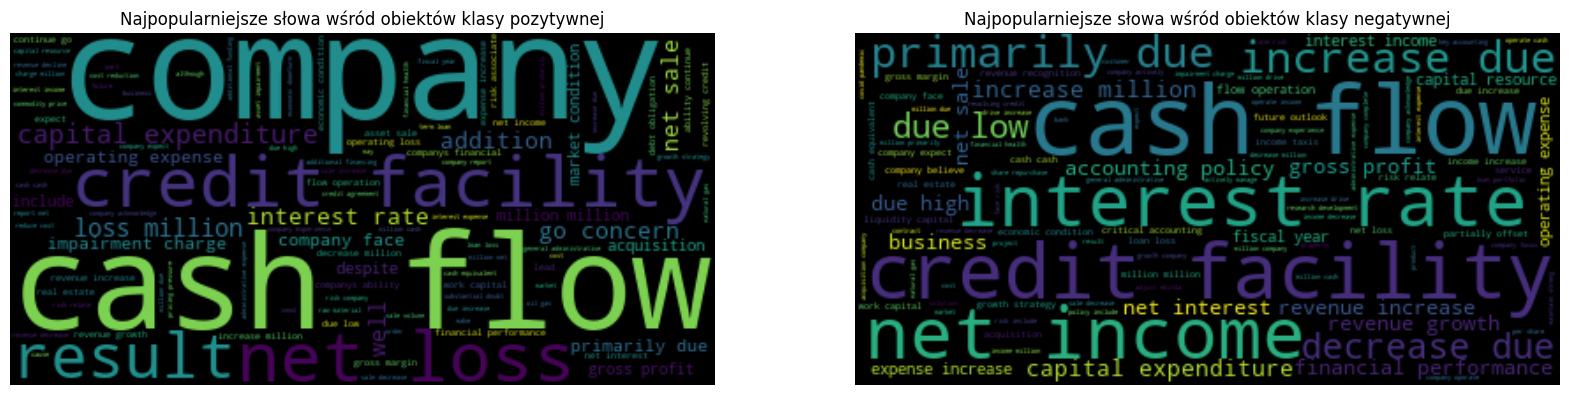

In [68]:
# plot wordclouds on one figure
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(wordcloud_bankrupt, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title('Najpopularniejsze słowa wśród obiektów klasy pozytywnej')

ax[1].imshow(wordcloud_non_bankrupt, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title('Najpopularniejsze słowa wśród obiektów klasy negatywnej')

plt.show()

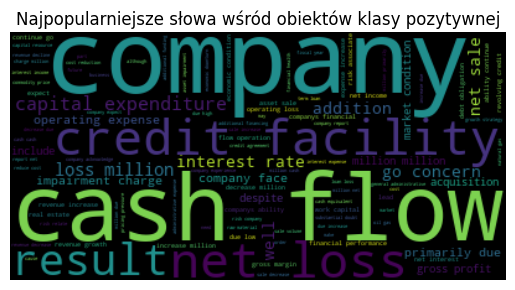

In [65]:
plt.imshow(wordcloud_bankrupt, interpolation='bilinear')
plt.axis("off")
plt.title('Najpopularniejsze słowa wśród obiektów klasy pozytywnej')
plt.show()

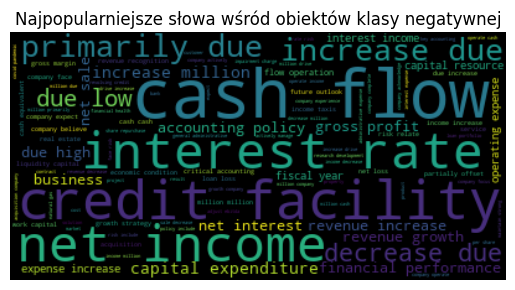

In [66]:
plt.imshow(wordcloud_non_bankrupt, interpolation='bilinear')
plt.axis("off")
plt.title('Najpopularniejsze słowa wśród obiektów klasy negatywnej')
plt.show()

### Checking the lexical Diversity
Evaluate the lexical diversity (ratio of unique words to total words) for both classes. Texts from one class should not be dominated by a few common words.

In [67]:
from collections import Counter

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

textual_dataset['lexical_diversity'] = textual_dataset['cleaned_text'].apply(lexical_diversity)
textual_dataset.groupby('label')['lexical_diversity'].mean()

label
False    0.698257
True     0.747079
Name: lexical_diversity, dtype: float64